In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [97]:
def add_gaussian_noise(img, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy = img.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)


In [98]:
def averaging_filter(img, ksize=5):
    return cv2.blur(img, (ksize, ksize))


In [99]:
def gaussian_blur(img, ksize=5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)


In [100]:
def add_salt_pepper_noise(img, amount=0.02):
    noisy = img.copy()
    num_pixels = int(amount * img.shape[0] * img.shape[1])

    # Salt (white)
    coords = [np.random.randint(0, i - 1, num_pixels) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Pepper (black)
    coords = [np.random.randint(0, i - 1, num_pixels) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 0

    return noisy


In [101]:
def median_blur(img, ksize=5):
    return cv2.medianBlur(img, ksize)


In [102]:
def bilateral_filter(img, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)


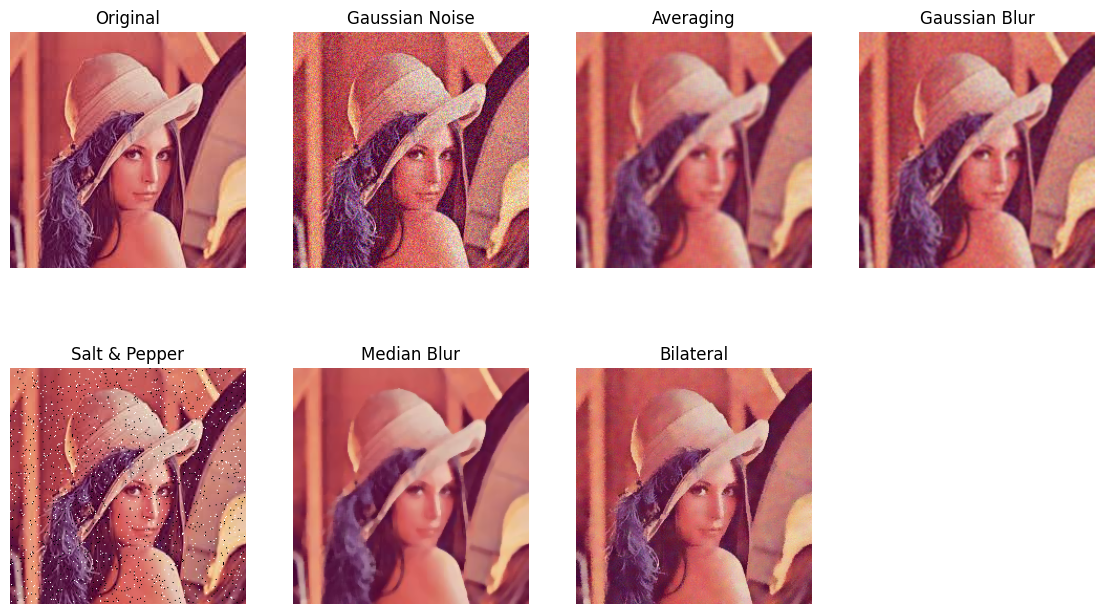

In [103]:
# قراءة الصورة
img = cv2.imread("sofia.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# إضافة الضوضاء
gaussian_noisy = add_gaussian_noise(img)
salt_pepper_noisy = add_salt_pepper_noise(img)

# تطبيق الفلاتر
avg = averaging_filter(gaussian_noisy)
gauss_blur = gaussian_blur(gaussian_noisy)
median = median_blur(salt_pepper_noisy)
bilateral = bilateral_filter(gaussian_noisy)

# العرض
titles = ["Original", "Gaussian Noise", "Averaging", "Gaussian Blur",
          "Salt & Pepper", "Median Blur", "Bilateral"]

images = [img, gaussian_noisy, avg, gauss_blur,
          salt_pepper_noisy, median, bilateral]

plt.figure(figsize=(14,8))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


In [104]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [105]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = np.uint8(sobel)


In [106]:
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

prewitt_x = cv2.filter2D(gray, -1, kernelx)
prewitt_y = cv2.filter2D(gray, -1, kernely)

prewitt = prewitt_x + prewitt_y


In [107]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))


In [108]:
canny = cv2.Canny(gray, 100, 200)


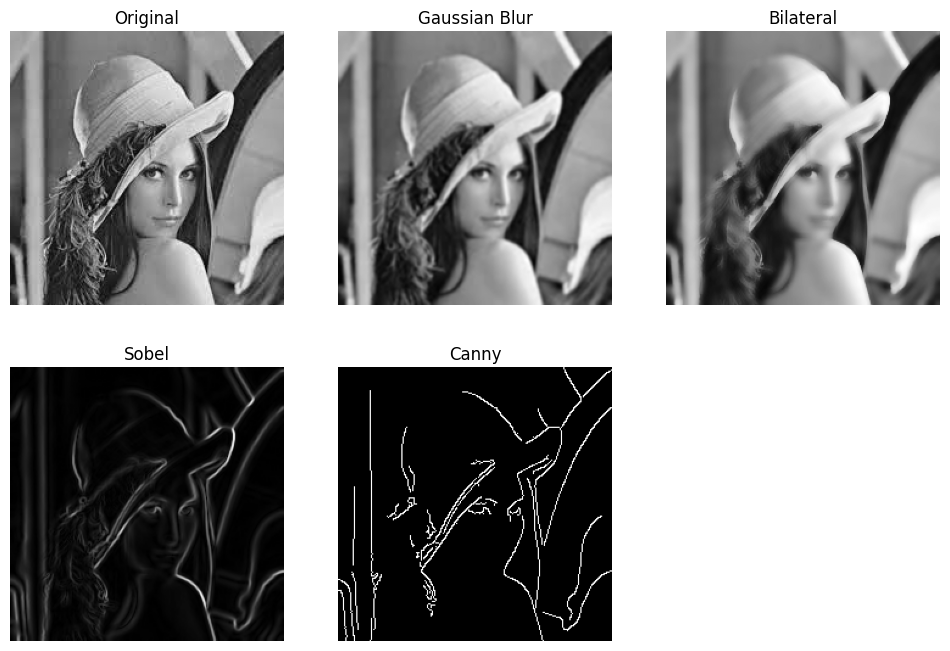

In [109]:
img = cv2.imread("sofia.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gaussian = cv2.GaussianBlur(gray, (5,5), 0)
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

sobelx = cv2.Sobel(bilateral, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(bilateral, cv2.CV_64F, 0, 1)
sobel = cv2.magnitude(sobelx, sobely)

canny = cv2.Canny(bilateral, 100, 200)

plt.figure(figsize=(12,8))
titles = ["Original", "Gaussian Blur", "Bilateral",
          "Sobel", "Canny"]

images = [gray, gaussian, bilateral, sobel, canny]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np

# قراءة الصورة
image = cv2.imread("image.jpg")

# تحويل إلى HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# ---------- نطاقات الألوان ----------

# الأحمر (له نطاقان)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# الأخضر
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# الأزرق
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# ---------- إنشاء Masks ----------
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# ---------- عزل الألوان ----------
red_result = cv2.bitwise_and(image, image, mask=mask_red)
green_result = cv2.bitwise_and(image, image, mask=mask_green)
blue_result = cv2.bitwise_and(image, image, mask=mask_blue)

# ---------- العرض ----------
cv2.imshow("Original", image)
cv2.imshow("Red", red_result)
cv2.imshow("Green", green_result)
cv2.imshow("Blue", blue_result)

cv2.waitKey(0)
cv2.destroyAllWindows()
